In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

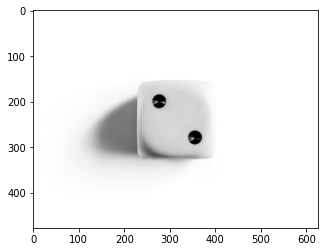

In [2]:
img = cv.imread( "img/dice 1.jpg" , 0)
orginal_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR);
plt.imshow(img, "gray")

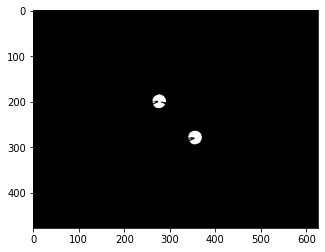

In [3]:
_ , threshold = cv.threshold(img , 70 , 255 , cv.THRESH_BINARY)
threshold = 255 - threshold
plt.imshow(threshold, cmap = "gray")

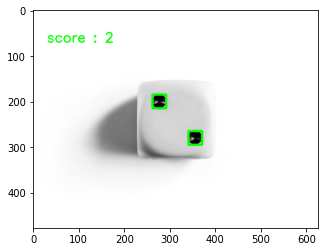

In [4]:
contours , _ = cv.findContours(threshold, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
score = 0
for c in contours:
    if len(c) > 100:
        x, y, w, h = cv.boundingRect(c)
        cv.rectangle(orginal_img, (x,y) , (x+w,y+h), (0, 255, 0), 4)
        score += 1

cv.putText(orginal_img, f'score : {score}', (30, 70), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0),thickness=2)
plt.imshow(orginal_img)

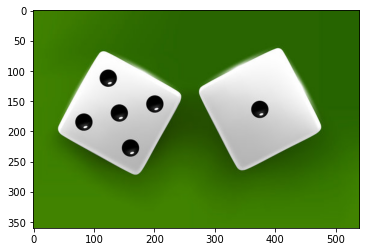

In [5]:
orginal_img = cv.imread( "img/dice 2.jpg")
img_gray = cv.imread( "img/dice 2.jpg" , cv.IMREAD_GRAYSCALE)
plt.imshow(orginal_img)

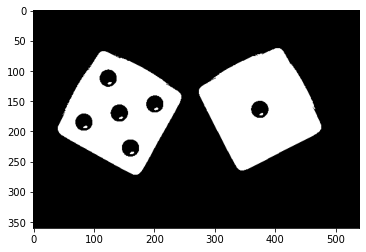

In [6]:
_ , threshold = cv.threshold(img_gray , 100 , 255 , cv.THRESH_BINARY)
plt.imshow(threshold,"gray")

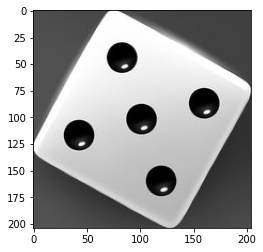

In [7]:
contours , _ = cv.findContours(threshold, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
dices = []

for c in contours:
    if len(c) > 250:
        x, y, w, h = cv.boundingRect(c)
        dice = img_gray[y:y+h,x:x+w]
        dices.append(dice)
        # cv.rectangle(orginal_img, (x,y) , (x+w,y+h), (255, 0, 0), 4)  
        
plt.imshow(dices[0], "gray")

In [8]:
circles_dice1 = cv.HoughCircles(dices[0], cv.HOUGH_GRADIENT,1,50,param1=100,param2=30,minRadius=0,maxRadius=0)
circles_dice2 = cv.HoughCircles(dices[1], cv.HOUGH_GRADIENT,1,20, param1=50,param2=30,minRadius=0,maxRadius=0)
score1 = len(circles_dice1[0, :])
score2 = len(circles_dice2[0, :])

_ = cv.putText(orginal_img, f'score of dice 1 : {score1}', (30, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),thickness=2)
_ = cv.putText(orginal_img, f'score of dice 2 : {score2}', (30, 60), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),thickness=2)

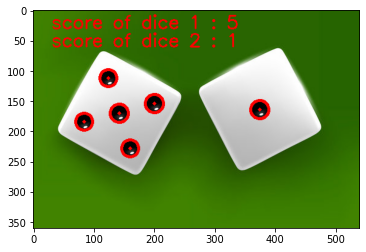

In [9]:
circles = cv.HoughCircles(img_gray, cv.HOUGH_GRADIENT, 1,50,param1=100, param2=30,minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0, :]:
    center = (i[0], i[1])
    # circle center
    cv.circle(orginal_img, center,1, (255,0,0), 3)
    # circle outline
    radius = i[2]
    cv.circle(orginal_img, center, radius, (255,0,0), 3)

plt.imshow(orginal_img)

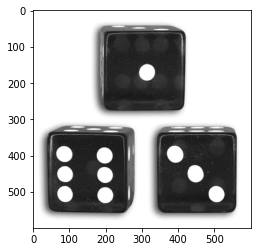

In [35]:
orginal_img = cv.imread( "img/dice 3.jpg")
orginal_img = cv.cvtColor(orginal_img, cv.COLOR_BGR2RGB)
img_gray = cv.imread( "img/dice 3.jpg" , cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray, "gray")

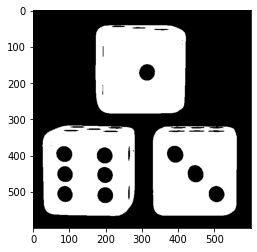

In [36]:
_ , threshold = cv.threshold(img_gray , 200 , 255 , cv.THRESH_BINARY)
threshold = 255 - threshold
plt.imshow(threshold,"gray")

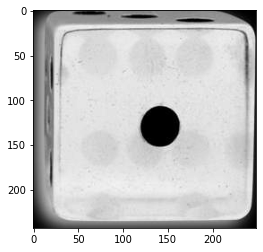

In [37]:
contours , _ = cv.findContours(threshold, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
dices = []

for c in contours:
    if len(c) > 250:
        x, y, w, h = cv.boundingRect(c)
        dice = img_gray[y:y+h,x:x+w]
        dices.append(255-dice)
        # cv.rectangle(orginal_img, (x,y) , (x+w,y+h), (255, 0, 0), 4)  
        
plt.imshow(dices[2], "gray")

In [38]:
circles_dice1 = cv.HoughCircles(dices[2], cv.HOUGH_GRADIENT,1,70,param1=150,param2=30,minRadius=0,maxRadius=0)
circles_dice2 = cv.HoughCircles(dices[1], cv.HOUGH_GRADIENT,1,60, param1=120,param2=30,minRadius=0,maxRadius=0)
circles_dice3 = cv.HoughCircles(dices[0], cv.HOUGH_GRADIENT,1,75, param1=190,param2=30,minRadius=0,maxRadius=0)
score1 = len(circles_dice1[0, :])
score2 = len(circles_dice2[0, :])
score3 = len(circles_dice3[0, :])

_ = cv.putText(orginal_img, f'score of dice 1 : {score1}', (30, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0),thickness=2)
_ = cv.putText(orginal_img, f'score of dice 2 : {score2}', (30, 60), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0),thickness=2)
_ = cv.putText(orginal_img, f'score of dice 3 : {score3}', (30, 90), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0),thickness=2)

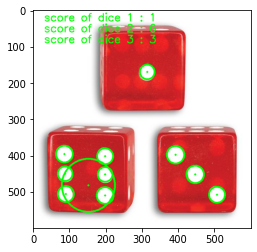

In [39]:
img_gray = cv.GaussianBlur(img_gray, (3, 3), 0)
lap = cv.Laplacian(img_gray ,cv.CV_16S)
lap = np.uint8(np.absolute(lap))
img_gray = cir = cv.medianBlur(lap, 5)
circles = cv.HoughCircles(img_gray, cv.HOUGH_GRADIENT, 1,50,param1=100, param2=30,minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0, :]:
    center = (i[0], i[1])
    cv.circle(orginal_img, center,1, (0,255,0), 3)
    radius = i[2]
    cv.circle(orginal_img, center, radius, (0,255,0), 3)

plt.imshow(orginal_img)

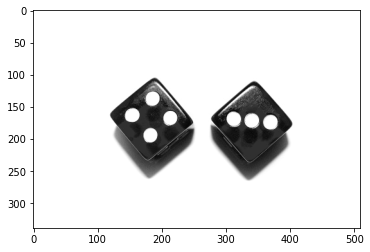

In [110]:
orginal_img = cv.imread( "img/dice 4.jpg")
orginal_img = cv.cvtColor(orginal_img, cv.COLOR_BGR2RGB)
img_gray = cv.imread( "img/dice 4.jpg" , cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray,"gray")

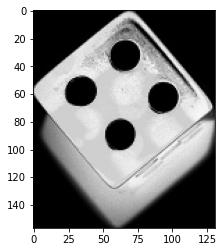

In [111]:
_ , threshold = cv.threshold(img_gray , 200 , 255 , cv.THRESH_BINARY)
threshold = 255 - threshold
contours , _ = cv.findContours(threshold, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
dices = []

for c in contours:
    if len(c) > 250:
        x, y, w, h = cv.boundingRect(c)
        dice = img_gray[y:y+h,x:x+w]
        dices.append(255-dice)
        # cv.rectangle(orginal_img, (x,y) , (x+w,y+h), (255, 0, 0), 4)  
        
plt.imshow(dices[1], "gray")

In [112]:
circles_dice1 = cv.HoughCircles(dices[1], cv.HOUGH_GRADIENT,1,30,param1=250,param2=30,minRadius=0,maxRadius=0)
circles_dice2 = cv.HoughCircles(dices[0], cv.HOUGH_GRADIENT,1,40, param1=150,param2=30,minRadius=0,maxRadius=0)
score1 = len(circles_dice1[0, :])
score2 = len(circles_dice2[0, :])

_ = cv.putText(orginal_img, f'score of dice 1 : {score1}', (30, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0),thickness=2)
_ = cv.putText(orginal_img, f'score of dice 2 : {score2}', (30, 60), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0),thickness=2)

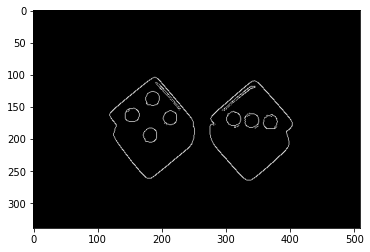

In [113]:
threshold = cv.threshold(img_gray,220,255, cv.THRESH_BINARY_INV)[1]
edge = cv.Canny(threshold,9, 150, 3)

circles = cv.HoughCircles(edge,cv.HOUGH_GRADIENT,1.2,20,param1=50,param2=25,minRadius=3,maxRadius=35)

plt.imshow(edge, "gray")
plt.show()

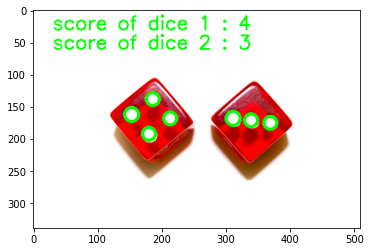

In [114]:
for i in circles[0, :]:
    center = (int(i[0]), int(i[1]))
    cv.circle(orginal_img, center,int(i[2]), (0,255,0), 3)
    radius = int(i[2])
    cv.circle(orginal_img, center, radius, (0,255,0), 3)

plt.imshow(orginal_img)